In [1]:
using Distributions
using LinearAlgebra
using Random

In [2]:
# Function to generate noisy observations
function generate_noisy_observations(θ, noise_std, num_samples)
    X = hcat(ones(num_samples), randn(num_samples))  # Design matrix
    true_y = X * θ
    noisy_y = true_y + noise_std * randn(num_samples)
    return X, noisy_y
end

generate_noisy_observations (generic function with 1 method)

In [3]:
# True parameter vector
θ_true = [2.0, 3.0]

# Parameters
noise_std = 0.5
num_samples = 100

# Generate noisy observations
X, noisy_y = generate_noisy_observations(θ_true, noise_std, num_samples);

In [4]:
# Estimate the parameter vector using least squares
θ_est = X \ noisy_y

# Calculate the residuals (error vector)
residuals = noisy_y - X * θ_est

# Calculate the error covariance matrix
error_covariance_matrix = cov(residuals)

0.2151273045159439

In [5]:
# Display the results
println("True θ: $θ_true")
println("Estimated θ: $θ_est")
println("Error Covariance Matrix:")
println(error_covariance_matrix)

True θ: [2.0, 3.0]
Estimated θ: [1.878146547742615, 3.0267350363721164]
Error Covariance Matrix:
0.2151273045159439


True θ: [2.0, 3.0]
Estimated θ: [2.0035598282808973, 3.071694886168325]
Residuals:
Covariance Matrix (Centered Residuals):


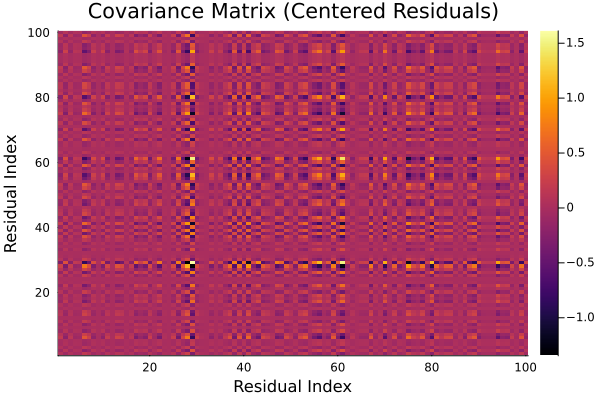

In [6]:
using LinearAlgebra
using Random
using Plots

# Function to generate noisy observations
function generate_noisy_observations(θ, noise_std, num_samples)
    X = hcat(ones(num_samples), randn(num_samples))  # Design matrix
    true_y = X * θ
    noisy_y = true_y + noise_std * randn(num_samples)
    return X, noisy_y
end

# True parameter vector
θ_true = [2.0, 3.0]

# Parameters
noise_std = 0.5
num_samples = 100

# Generate noisy observations
X, noisy_y = generate_noisy_observations(θ_true, noise_std, num_samples)

# Estimate the parameter vector using least squares
θ_est = X \ noisy_y

# Calculate the residuals (error vector)
residuals = noisy_y - X * θ_est

# Calculate the mean of residuals
mean_residuals = mean(residuals)

# Subtract the mean from each element of residuals
residuals_centered = residuals .- mean_residuals

# Calculate the covariance matrix using the centered residuals
covariance_matrix = residuals_centered * residuals_centered';

# Display the results
println("True θ: $θ_true")
println("Estimated θ: $θ_est")
println("Residuals:")
# println(residuals)
println("Covariance Matrix (Centered Residuals):")
# println(covariance_matrix)

# Plotting
scatter(X[:, 2], noisy_y, label="Noisy Observations", xlabel="X", ylabel="Y", legend=:bottomright)
plot!(X[:, 2], X * θ_true, label="True Linear Model", linestyle=:dash)
plot!(X[:, 2], X * θ_est, label="Estimated Linear Model", linestyle=:dashdot)

# Heatmap of the covariance matrix
heatmap(covariance_matrix, title="Covariance Matrix (Centered Residuals)", xlabel="Residual Index", ylabel="Residual Index")


The covariance matrix as $E[(X - E[X])(X - E[X])^T]$ using the centered data:


# References
- [ ] [Error Covariance Matrices](https://rom-saf.eumetsat.int/error-covariance.php)